In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# load the first data, use ; as separator
data0= pd.read_csv('prices_round_1_day_0.csv', sep=';')
data1 = pd.read_csv('prices_round_1_day_-1.csv', sep=';')
data2 = pd.read_csv('prices_round_1_day_-2.csv', sep=';')


In [9]:
# merge them togetherL data2, data1, data0
data = pd.concat([data2, data1, data0])
data

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-2,0,AMETHYSTS,9996,1,9995.0,25.0,NaN,NaN,10004,1,10005.0,25.0,NaN,NaN,10000.0,0.0
1,-2,0,STARFRUIT,4997,26,NaN,NaN,NaN,NaN,5003,26,NaN,NaN,NaN,NaN,5000.0,0.0
2,-2,100,AMETHYSTS,10000,5,9995.0,20.0,NaN,NaN,10005,20,NaN,NaN,NaN,NaN,10002.5,0.0
3,-2,100,STARFRUIT,5000,5,4998.0,6.0,4997.0,20.0,5004,20,NaN,NaN,NaN,NaN,5002.0,0.0
4,-2,200,STARFRUIT,4997,1,4996.0,30.0,NaN,NaN,5003,31,NaN,NaN,NaN,NaN,5000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,999700,STARFRUIT,5053,1,5048.0,26.0,NaN,NaN,5054,2,5055.0,24.0,NaN,NaN,5053.5,0.0
19996,0,999800,STARFRUIT,5047,27,NaN,NaN,NaN,NaN,5052,1,5054.0,27.0,NaN,NaN,5049.5,0.0
19997,0,999800,AMETHYSTS,9995,27,NaN,NaN,NaN,NaN,10005,27,NaN,NaN,NaN,NaN,10000.0,0.0
19998,0,999900,STARFRUIT,5048,2,5047.0,21.0,NaN,NaN,5054,23,NaN,NaN,NaN,NaN,5051.0,0.0


In [27]:
# get AMETHYSTS
amethysts_df = data1[data1['product'] == 'AMETHYSTS']
amethysts_df

df_starfruit = data1[data1['product'] == 'STARFRUIT']

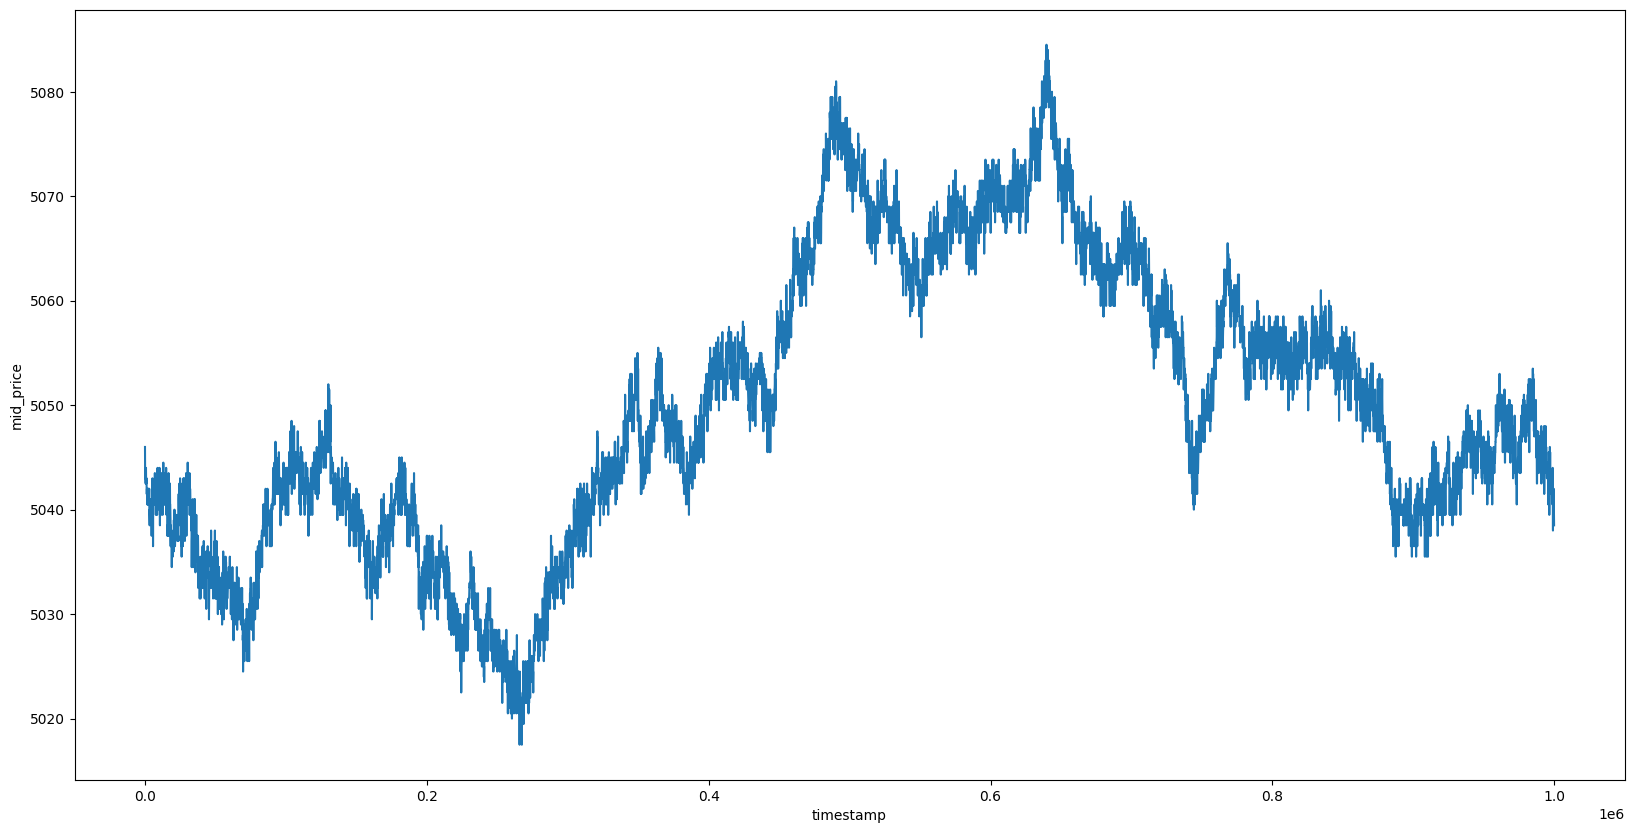

In [28]:
# make plot bigger
plt.figure(figsize=(20, 10))

# visualize the price of STARFRUIT
sns.lineplot(data=df_starfruit, x='timestamp', y='mid_price')
plt.show()

In [29]:
# working on ml

from sklearn.linear_model import LinearRegression

# create a model
model = LinearRegression()

# train the model
model.fit(amethysts_df[['timestamp']], amethysts_df['mid_price'])

# get coefficient
print("coefficient: ", model.coef_)
# get intercept
print("intercept: ", model.intercept_)

coefficient:  [-9.34166409e-08]
intercept:  10000.033103649635


In [30]:
from sklearn.linear_model import LinearRegression

class RollingRegressor:
    def __init__(self, window_size):
        self.window_size = window_size
        self.data = []
        
    def update_and_predict(self, new_point):
        self.data.append(new_point)
        if len(self.data) > self.window_size:
            self.data.pop(0)
        
        if len(self.data) < self.window_size:
            return None  # Not enough points to predict
        
        X = [[i] for i in range(len(self.data))]
        y = self.data
        model = LinearRegression().fit(X, y)
        
        return model.predict([[len(self.data)]])[0]

# Initialize the regressor
regressor = RollingRegressor(window_size=4)

# Apply the regressor to the data
df_starfruit['predicted_mid_price'] = df_starfruit['mid_price'].apply(regressor.update_and_predict)


C:\Users\Thieu\AppData\Local\Temp\ipykernel_11640\162524978.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_starfruit['predicted_mid_price'] = df_starfruit['mid_price'].apply(regressor.update_and_predict)


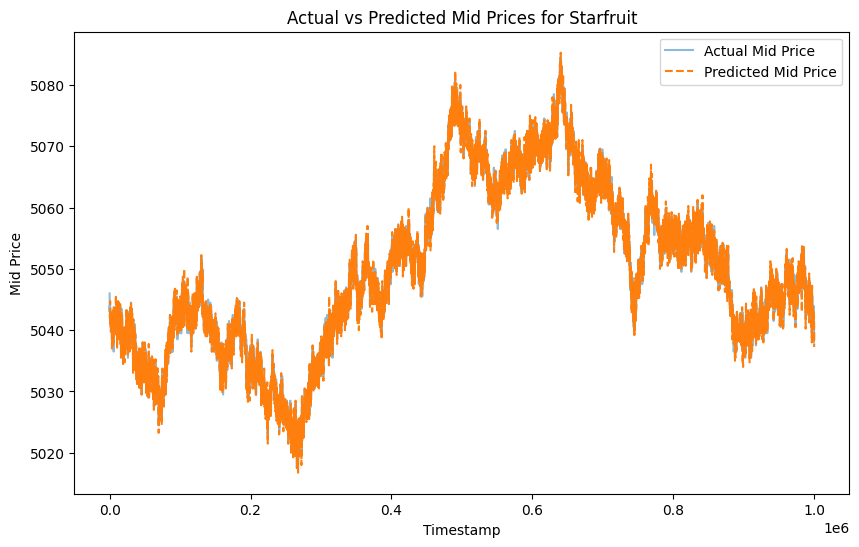

In [31]:
# visualize the predicted price of STARFRUIT

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df_starfruit['timestamp'], df_starfruit['mid_price'], label='Actual Mid Price', alpha=0.5)
plt.plot(df_starfruit['timestamp'], df_starfruit['predicted_mid_price'], label='Predicted Mid Price', linestyle='--')
plt.title('Actual vs Predicted Mid Prices for Starfruit')
plt.xlabel('Timestamp')
plt.ylabel('Mid Price')
plt.legend()
plt.show()


In [34]:
# evaluate


from sklearn.metrics import mean_squared_error, mean_absolute_error

# Filtering out the None values for evaluation
valid_df = df_starfruit.dropna(subset=['predicted_mid_price'])

mse = mean_squared_error(valid_df['mid_price'], valid_df['predicted_mid_price'])
mae = mean_absolute_error(valid_df['mid_price'], valid_df['predicted_mid_price'])

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")


Mean Squared Error: 0.7600280084025207
Mean Absolute Error: 0.6447434230269081


In [35]:
class RollingRegressor:
    def __init__(self, window_size):
        self.window_size = window_size
        self.data = []
        
    def update_and_predict(self, new_point):
        self.data.append(new_point)
        if len(self.data) > self.window_size:
            self.data.pop(0)
        
        if len(self.data) < self.window_size:
            return None  # Not enough points to predict
        
        X = [[i] for i in range(len(self.data))]
        y = self.data
        model = LinearRegression().fit(X, y)
        
        # Print the coefficient and intercept
        print(f"Updated Coefficient: {model.coef_[0]}")
        print(f"Updated Intercept: {model.intercept_}")
        
        return model.predict([[len(self.data)]])[0]

# Initialize the regressor with a window size of 4
regressor = RollingRegressor(window_size=4)

# Apply the regressor to the STARFRUIT data to see the coefficients and intercepts printed out
for index, row in df_starfruit.iterrows():
    predicted_price = regressor.update_and_predict(row['mid_price'])
    print(f"Predicted price at index {index}: {predicted_price}")


Predicted price at index 1: None
Predicted price at index 2: None
Predicted price at index 5: None
Updated Coefficient: -0.7999999999999998
Updated Intercept: 5045.2
Predicted price at index 7: 5042.0
Updated Coefficient: -0.25
Updated Intercept: 5043.5
Predicted price at index 9: 5042.5
Updated Coefficient: -0.49999999999999983
Updated Intercept: 5043.75
Predicted price at index 10: 5041.75
Updated Coefficient: 0.3
Updated Intercept: 5042.55
Predicted price at index 13: 5043.75
Updated Coefficient: 0.5999999999999999
Updated Intercept: 5042.35
Predicted price at index 15: 5044.75
Updated Coefficient: -4.965068306494546e-17
Updated Intercept: 5043.25
Predicted price at index 17: 5043.25
Updated Coefficient: -0.44999999999999996
Updated Intercept: 5044.05
Predicted price at index 18: 5042.25
Updated Coefficient: -0.3999999999999999
Updated Intercept: 5043.6
Predicted price at index 21: 5042.0
Updated Coefficient: 0.09999999999999998
Updated Intercept: 5042.6
Predicted price at index 23:

### Find Coef and Intercept

In [40]:
class RollingRegressor:
    def __init__(self, window_size):
        self.window_size = window_size
        self.data = []
        self.models_performance = []  # Store the performance of each model

    def update_and_predict(self, new_point):
        if len(self.data) >= self.window_size:
            self.data.pop(0)
        self.data.append(new_point)

        if len(self.data) < self.window_size:
            return None  # Not enough points to predict

        X = [[i] for i in range(len(self.data) - 1)]
        y = self.data[:-1]
        model = LinearRegression().fit(X, y)
        predicted = model.predict([[len(self.data) - 1]])[0]
        actual = self.data[-1]
        error = (actual - predicted) ** 2  # Squared error

        # Store model's performance, coefficient, and intercept
        self.models_performance.append((error, model.coef_[0], model.intercept_))

        return predicted


In [41]:
# Initialize and apply the regressor
regressor = RollingRegressor(window_size=4)
for price in df_starfruit['mid_price']:
    regressor.update_and_predict(price)

# Sort the models by their performance and pick the top 4
top_models = sorted(regressor.models_performance, key=lambda x: x[0])[:4]

# Unpack the top 4 models
for i, model in enumerate(top_models, 1):
    error, coef, intercept = model
    print(f"Model {i}: Error = {error}, Coefficient = {coef}, Intercept = {intercept}")


Model 1: Error = 0.0, Coefficient = 0.0, Intercept = 5041.0
Model 2: Error = 0.0, Coefficient = 0.0, Intercept = 5041.0
Model 3: Error = 0.0, Coefficient = 0.0, Intercept = 5041.0
Model 4: Error = 0.0, Coefficient = 1.1775693440128312e-16, Intercept = 5041.5


In [47]:
def simple_linear_regression(X, y):
    n = len(X)
    sum_x = sum(X)
    sum_y = sum(y)
    sum_xy = sum(x * y for x, y in zip(X, y))
    sum_xx = sum(x ** 2 for x in X)
    
    m = (n * sum_xy - sum_x * sum_y) / (n * sum_xx - sum_x ** 2)
    b = (sum_y - m * sum_x) / n
    return m, b

class RollingRegressor:
    def __init__(self, window_size):
        self.window_size = window_size
        self.data = []
        self.predictions = []

    def update_and_predict(self, new_point):
        if len(self.data) >= self.window_size:
            self.data.pop(0)
        self.data.append(new_point)

        if len(self.data) < self.window_size:
            self.predictions.append(None)
            return None

        X = list(range(len(self.data)))
        y = self.data
        m, b = simple_linear_regression(X, y)
        predicted = m * len(self.data) + b  # Predicting the next point
        self.predictions.append(predicted)
        return predicted


In [48]:
regressor = RollingRegressor(window_size=4)

# entire STARFRUIT data
df_starfruit = data[data['product'] == 'STARFRUIT']

df_starfruit['predicted_mid_price'] = df_starfruit['mid_price'].apply(regressor.update_and_predict)


C:\Users\Thieu\AppData\Local\Temp\ipykernel_11640\623190731.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_starfruit['predicted_mid_price'] = df_starfruit['mid_price'].apply(regressor.update_and_predict)


In [49]:
from sklearn.metrics import mean_squared_error

# Filter out the None values
actual_prices = df_starfruit['mid_price'][3:]  # Skipping the first 3 values as they don't have predictions
predicted_prices = regressor.predictions[3:]  # Predictions start after the first window is filled

mse = mean_squared_error(actual_prices, predicted_prices)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.7592009200920092


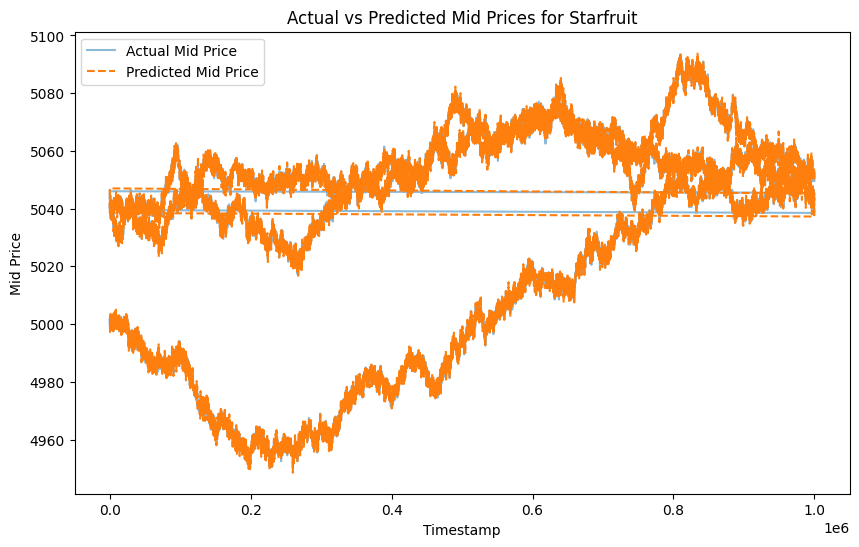

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df_starfruit['timestamp'], df_starfruit['mid_price'], label='Actual Mid Price', alpha=0.5)
plt.plot(df_starfruit['timestamp'], df_starfruit['predicted_mid_price'], label='Predicted Mid Price', linestyle='--')
plt.title('Actual vs Predicted Mid Prices for Starfruit')
plt.xlabel('Timestamp')
plt.ylabel('Mid Price')
plt.legend()
plt.show()
